# **Assignment 4 : Bag-of-words model**

Now that you have learned several different similarity measures, I think it would be cool to apply your unique set of
skills on a real-world problem; “Content-based query of articles”.

**Goal:**
Learn a little bit of text mining by applying cosine similarity measure on text documents. We would like to
experience automation of comparison of text documents, which can be applied to a search engine whose
job is to look for the most relevant articles in a database to the given keywords.

**Input:**

*   ├── DataMining.txt (Source: https://en.wikipedia.org/wiki/Data_mining)
*   ├── LinearAlgebra.txt (Source: https://en.wikipedia.org/wiki/Linear_algebra)
*   ├── MachineLearning.txt (Source: https://en.wikipedia.org/wiki/Machine_learning)
*  └── Statistics.txt (Source: https://en.wikipedia.org/wiki/Statistics)


**Keywords:** {statistics, analysis, linear, data, mining, knowledge, machine,
information, discovery, complexity, memory, pattern, predictive, sampling, vector, dimensional, intelligence, algorithm, mathematics, equation}



**Question 0:** Upload the *'Statistics.txt', 'DataMining.txt', 'LinearAlgebra.txt', and 'MachineLearning.txt'* under the sample_data folder and open the files for reading.

In [20]:


import numpy as np
import string
from collections import Counter
import math
names =['Statistics','Data Mining', 'Linear Algebra','Machine Learning']

doc1_stats = open("sample_data/Statistics.txt", "r").read().lower()
doc2_DM = open("sample_data/DataMining.txt", "r").read().lower()
doc3_LA = open("sample_data/LinearAlgebra.txt", "r").read().lower()
doc4_ML = open("sample_data/MachineLearning.txt", "r").read().lower()

keywords = ['statistics', 'analysis', 'linear', 'data', 'mining', 'knowledge', 'machine',
'information','discovery','complexity','memory', 'pattern', 'predictive', 'sampling', 'vector','dimensional', 'intelligence', 'algorithm','mathematics','equation']


In [2]:
pip install matplotlib --upgrade

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.1)
ERROR: Operation cancelled by user


**Question 1:** Define a function that takes the keywords list and a given document as an input and returns a dictionary of the terms occurances in the keywords list.

In [21]:
def get_dictionary(keywords, documment):
  termfrequnecy_dictionary = dict()
  for i in range(len(keywords)):
    occurrences = documment.count(keywords[i])
    termfrequnecy_dictionary.update({keywords[i]:occurrences})
  return termfrequnecy_dictionary


**Question 2:** Define a function that takes two dictionaries and returns the cosine similarity between their values. 
> 
    Hint: The cosine similarity is equal to 1 - cosine distance


In [22]:
from scipy.spatial.distance import cosine
import pandas as pd

def get_cosineSimilairy(termfrequnecy_dictionary1, termfrequnecy_dictionary2):
  dict1 = pd.Series(termfrequnecy_dictionary1)
  dict2 = pd.Series(termfrequnecy_dictionary2)

  similarity = (1 - cosine(dict1, dict2))
  return similarity

print(get_cosineSimilairy(get_dictionary(keywords,doc1_stats), get_dictionary(keywords,doc2_DM)))


#ref https://stackoverflow.com/questions/41827983/right-way-to-calculate-the-cosine-similarity-of-two-word-frequency-dictionaries

0.5151122398156225


**Question 3:** Draw the cosine similarity matrix between the four documents like the example below: https://drive.google.com/file/d/16MGf5KBO9A8JORodEYVRbOvUSswLTvuj/view?usp=sharing

(<Figure size 662.4x360 with 1 Axes>, <AxesSubplot:>)

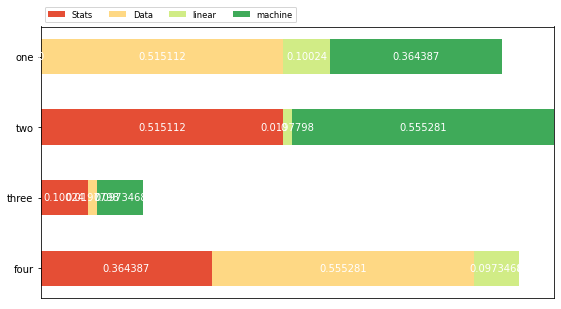

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

category_names = ['Stats', 'Data', 'linear','machine']
results = {
  'one': [0,0.5151122398156225,0.10023952792479451,0.3643866661418129],
  'two': [0.5151122398156225,0,0.01977984151119183,0.5552811278594216],
  'three': [0.10023952792479451,0.01977984151119183,0,0.09734680548155406],
  'four': [0.3643866661418129,0.5552811278594216,0.09734680548155406,0]
}

def draw_matrix(results, category_names):
  # a = get_cosineSimilairy(get_dictionary(keywords,doc1_stats),get_dictionary(keywords,doc2_DM))
  # b = get_cosineSimilairy(get_dictionary(keywords,doc1_stats),get_dictionary(keywords,doc3_LA))
  # c = get_cosineSimilairy(get_dictionary(keywords,doc1_stats),get_dictionary(keywords,doc4_ML))
  # d = get_cosineSimilairy(get_dictionary(keywords,doc2_DM),get_dictionary(keywords,doc3_LA))
  # e = get_cosineSimilairy(get_dictionary(keywords,doc2_DM),get_dictionary(keywords,doc4_ML))
  # f = get_cosineSimilairy(get_dictionary(keywords,doc3_LA),get_dictionary(keywords,doc4_ML))
  # print("---1 compared to 2 : ",a,"---1 compared to 3 : ",b,"---1 compared to 4 : ",c,"---2 compared to 3 : ",d,"---2 compared to 4 : ",e,"---3 compared to 4 : ",f)
  # stats =[0,0.5151122398156225,0.10023952792479451,0.3643866661418129]
  # datamining =[0.5151122398156225,0,0.01977984151119183,0.5552811278594216]
  # linear =[0.10023952792479451,0.01977984151119183,0,0.09734680548155406]
  # machine =[0.3643866661418129,0.5552811278594216,0.09734680548155406,0]
  labels = list(results.keys())
  data = np.array(list(results.values()))
  data_cum = data.cumsum(axis=1)
  category_colors = plt.get_cmap('RdYlGn')(
      np.linspace(0.15, 0.85, data.shape[1]))

  fig, ax = plt.subplots(figsize=(9.2, 5))
  ax.invert_yaxis()
  ax.xaxis.set_visible(False)
  ax.set_xlim(0, np.sum(data, axis=1).max())

  for i, (colname, color) in enumerate(zip(category_names, category_colors)):
      widths = data[:, i]
      starts = data_cum[:, i] - widths
      rects = ax.barh(labels, widths, left=starts, height=0.5,
                      label=colname, color=color)

      r, g, b, _ = color
      text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
      ax.bar_label(rects, label_type='center', color=text_color)
  ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
            loc='lower left', fontsize='small')

  return fig, ax

  # print(results)

draw_matrix(results, category_names)

#from the matplotlib docs https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html


**Question 4:** Define a function that computes the inverse document frequency (IDF) of the terms in the keywords list.

    Hint:
    *   IDF = log(n/df(d,t))
    *   n: number of documents, in this case we have 4 documents.
    *   df(d,t): the number of documents containing the term t.






In [60]:
import math
dictionary_lst = [get_dictionary(keywords, doc1_stats),
                  get_dictionary(keywords, doc2_DM),
                  get_dictionary(keywords, doc3_LA),
                  get_dictionary(keywords, doc4_ML)] 

def get_IDF(keywords, dictionary_lst):
  IDF = {}
  n = len(dictionary_lst)
  
  IDF = dict.fromkeys(dictionary_lst[0].keys(),0)
  for doc in dictionary_lst:
    for word, val in doc.items():
      if val > 0:
        IDF[word] += 1
  for word, val in IDF.items():
    IDF[word] = math.log10(n/float(val))

  return IDF

get_IDF(keywords, dictionary_lst)

#ref https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/

{'algorithm': 0.0,
 'analysis': 0.0,
 'complexity': 0.3010299956639812,
 'data': 0.0,
 'dimensional': 0.3010299956639812,
 'discovery': 0.3010299956639812,
 'equation': 0.3010299956639812,
 'information': 0.12493873660829992,
 'intelligence': 0.12493873660829992,
 'knowledge': 0.12493873660829992,
 'linear': 0.0,
 'machine': 0.12493873660829992,
 'mathematics': 0.12493873660829992,
 'memory': 0.6020599913279624,
 'mining': 0.0,
 'pattern': 0.12493873660829992,
 'predictive': 0.12493873660829992,
 'sampling': 0.6020599913279624,
 'statistics': 0.0,
 'vector': 0.0}

**Question 5:** Define a function that computes the TF-IDF vector for each document.
> 
    Hint:
    *   TF-IDF = TF * IDF
    *   TF: frequency of the terms computed in the dictionary



In [71]:
def get_TFIDF(termfrequnecy_dictionary1, IDF):
  TFIDF = []
  for word in IDF:
    TFIDF.append(float(termfrequnecy_dictionary1[word]) * float(IDF[word]))
  return TFIDF

get_TFIDF(get_dictionary(keywords,doc4_ML),get_IDF(keywords, dictionary_lst))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.123958522341099,
 23.238605009143786,
 1.9990197857327987,
 2.709269960975831,
 1.505149978319906,
 1.806179973983887,
 2.123958522341099,
 0.4997549464331997,
 0.0,
 0.0,
 2.4082399653118496,
 3.498284625032398,
 0.0,
 0.12493873660829992,
 0.0]

**Question 6:** What is the most important term for each of the four documents? (term with the highest TF-IDF score)

1. The most important term for *Statistics.txt* is: Sampling
2. The most important term for *DataMining.txt* is: Discovery
3. The most important term for *LinearAlgebra.txt* is: Equation 
4. Rhe most important term for *MachineLearning.txt* is: Machine 